In [406]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [407]:
import pandas as pd
import numpy as np
from pathlib import Path
base_path = Path('/content/drive/MyDrive/data') # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

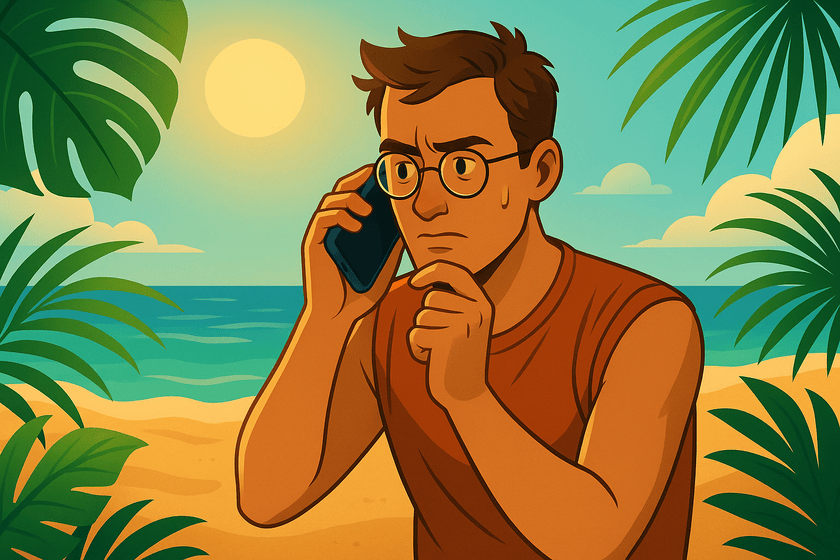

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [408]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

# **1. EDA**

---

**Rozpoczynamy od sprawdzenia jak wygląda struktura danych**

---

In [409]:
titanic_df.iloc[814:844]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
815,0,3,"Tomlin, Mr. Ernest Portage",male,30.50,0,0,364499,8.0500,NaN,S
816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
817,0,3,"Heininen, Miss. Wendla Maria",female,23.00,0,0,STON/O2. 3101290,7.9250,NaN,S
818,0,2,"Mallet, Mr. Albert",male,31.00,1,1,S.C./PARIS 2079,37.0042,NaN,C
819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.00,0,0,C 7075,6.4500,NaN,S
820,0,3,"Skoog, Master. Karl Thorsten",male,10.00,3,2,347088,27.9000,NaN,S
821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.00,1,1,12749,93.5000,B69,S
822,1,3,"Lulic, Mr. Nikola",male,27.00,0,0,315098,8.6625,NaN,S
823,0,1,"Reuchlin, Jonkheer. John George",male,38.00,0,0,19972,NaN,NaN,S


In [410]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      793 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Sprawdzamy które dane są ważne a które mniej w kotekście zadania**


---



| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Ważne przyda się do określenia czy osoba przeżyła czy też nie.                                         |
| **Pclass**   | Zostawiamy przyda się przy określeniu jaka klasa podróży miała większe szanse na przeżycie.                       |
| **Name**     | Totalnie nie potrzebne (powoduje szum) .                                                       |
| **Sex**      | Zostawiamy (Płeć osoby która przeżyła).                             |
| **Age**      | Zostawiamy (Wiek pasażera w latach).                                                         |
| **SibSp**    | Zostawiamy (Liczba rodzeństwa i małżonków na pokładzie).                                     |
| **Parch**    | Zostawiamy (Liczba rodziców i dzieci na pokładzie).                                          |
| **Ticket**   | Wyrzucamy ponieważ próba staje się nie reprezentatywna bo każdy ma swój indywidualny numer biletu.                                                                   |
| **Fare**     | Zostawiamy Cena biletu może świadczyć o statusie majętności.                                                                    |
| **Cabin**    | Wyrzucamy (każda kajuta ma swój indywidualny nie jest reprezentatywna powodować będzie tylko szum ).                                   |
| **Embarked** | Zostawiamy |
                                                         |



**Wyciągamy tytuły z kolumny** `Name` **by uzupełnić brakujące wartości w kolumnie age za pomocą mediany**




---



In [411]:
titanic_df['Title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.')
titanic_df['Age'] = titanic_df['Age'].fillna(
    titanic_df.groupby('Title')['Age'].transform('median')
)

**Zaokrąglamy wartości nie będące liczbami całkowitymi i zmieniamy datatype wieku z** `float64` **na** `int64`

---



In [413]:
titanic_df['Age'] = np.round(titanic_df['Age'])


In [414]:
titanic_df['Age'] = pd.to_numeric(titanic_df['Age']).astype('int64')

**Dodajemy nową kolumnę z wielkością rodziny.**

---



In [415]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

**Dodajemy kolejną nową kolumnę z literą pokładu wyciągniętą z kolumny.** `cabin`

---



In [416]:
titanic_df['Deck'] = titanic_df['Cabin'].str[0]

In [417]:
titanic_df['Deck'].value_counts()

,count
Deck,
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


**Uzupełniamy brakujące dane w kolumine na podstawie rozkładu w danej klasie pasażerskiej na podstawie rozkładu danych nie brakujących**


---



In [441]:
def sample_deck(row):
    deck_dist = titanic_df.dropna(subset=['Deck']).groupby('Pclass')['Deck'].value_counts(normalize=True)
    if pd.isna(row['Deck']):
        pclass = row['Pclass']
        dist = deck_dist[pclass]
        return np.random.choice(dist.index, p=dist.values)
    else:
        return row['Deck']
titanic_df['Deck'] = titanic_df.apply(sample_deck, axis=1)

**Uzupełniam braki w kolumnie "Embarked"**

---



In [419]:
titanic_df['Embarked']=titanic_df['Embarked'].fillna('Unknown')

**Wypełniamy puste wartości medianą i zrzucamy niepotrzebne kolumny**

---



In [420]:
titanic_df['Fare'] =titanic_df['Fare'].fillna(titanic_df.groupby(['Pclass', 'Embarked'])['Fare'].transform('median'))

In [421]:
titanic_df['Fare'] = np.ceil(titanic_df['Fare']*100)/100

In [423]:
titanic_df=titanic_df.drop(columns=['Name','Ticket','Cabin','Title'])
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    int64  
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   FamilySize  891 non-null    int64  
 9   Deck        891 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 76.6+ KB


**Wszystkie wartości zostały uzupełnione przechodzimy do wizualizacji**

---



# **2. Wizualizacja Danych**

In [424]:
import matplotlib.pyplot as plt
import seaborn as sns

  **Patrzymy na dystrybucje danych, stosujemy histogramy dla wartości numerycznych**

---



In [425]:
def plot_numeric_histogram(df, column_name):
    """
    Plots a histogram for the specified column in the DataFrame,
    and adds vertical lines for the mean and median.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
    Returns:
        None. Displays the histogram.
    """

    data = df[column_name].dropna()
    mean_val = data.mean()
    median_val = data.median()

    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30, color='steelblue', edgecolor='black')
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()


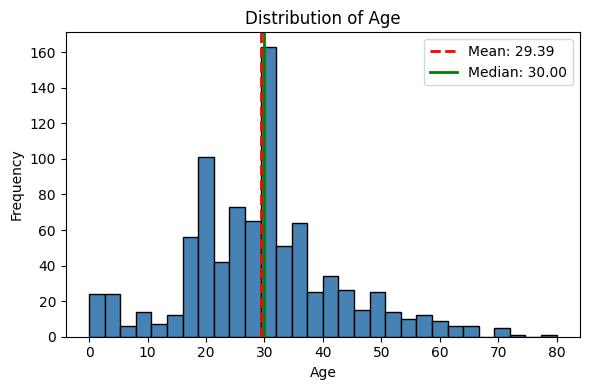

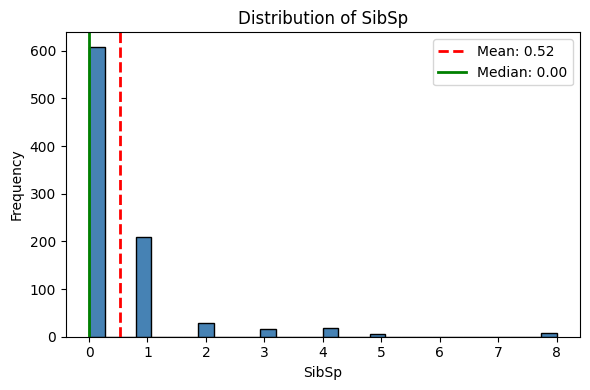

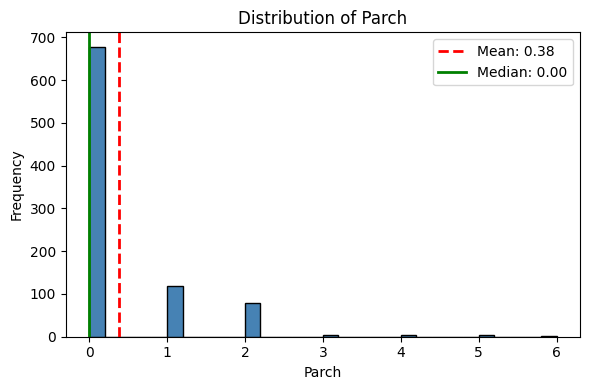

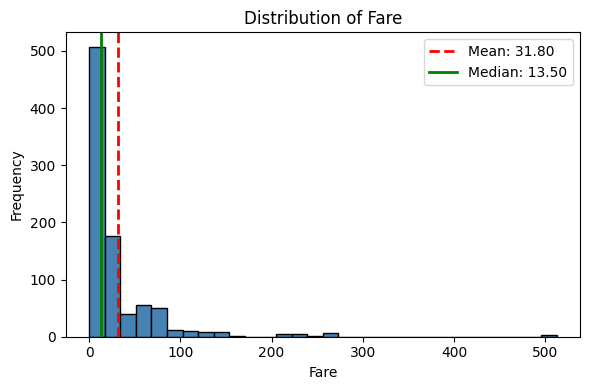

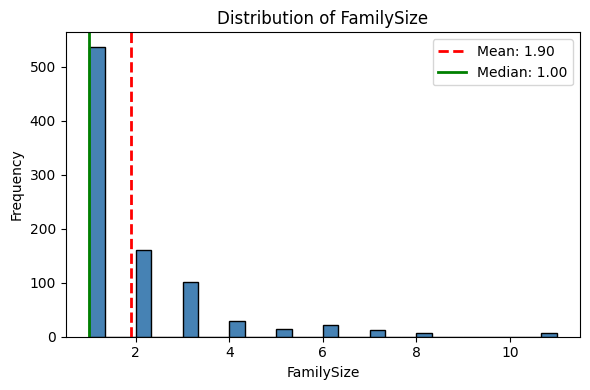

In [445]:
for col in ['Age','SibSp','Parch','Fare','FamilySize']:
  plot_numeric_histogram(titanic_df,col)

**Spoglądamy na wartości skrajne w kolumnach z wartościami numerycznymi, stosujemy do tego wykresy pudełkowe**


---



In [427]:
def boxplot(df, column_name):
    """
    Displays a boxplot of the choosen column to show its distribution.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to plot.
    Returns:
        None. Displays the bar chart.
    """
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column_name].dropna(), color='lightgreen') # as you can see, you can use sns and plt at the same time
    plt.title(f'Distribution of {column_name} (boxplot)')
    plt.xlabel(column_name)

    plt.show()

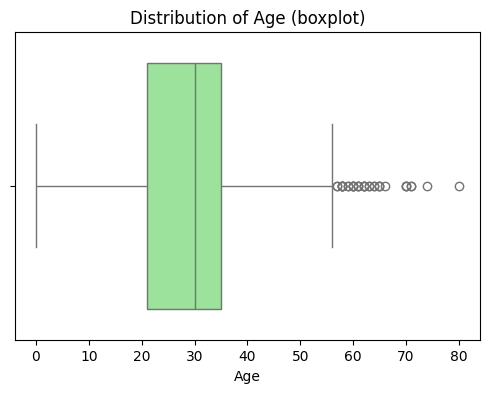

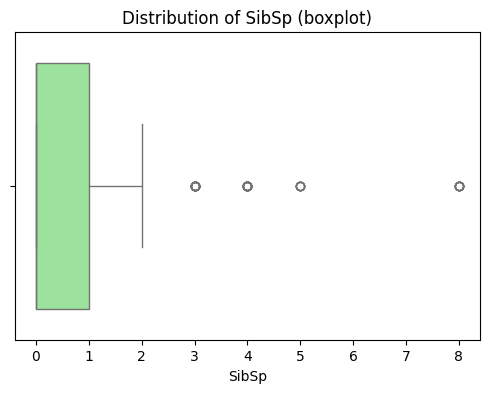

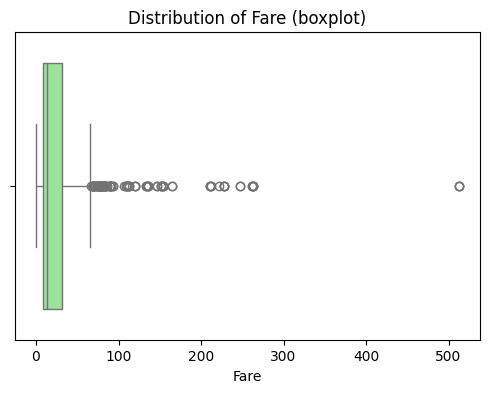

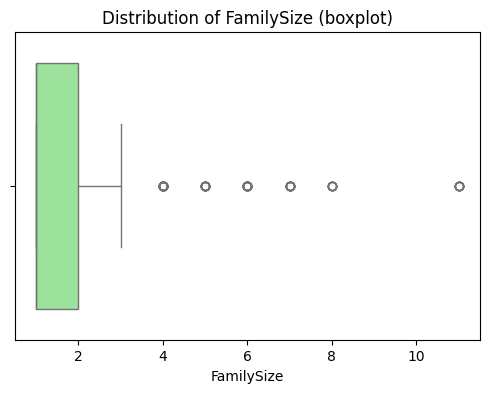

In [444]:
for col in ['Age','SibSp','Fare','FamilySize']:
  boxplot(titanic_df,col)


In [429]:
Q1 = titanic_df['Fare'].quantile(0.25) # lower quantile
Q3 = titanic_df['Fare'].quantile(0.75) # upper quantile
IQR = Q3 - Q1
upper_bound = Q3 + 3 * IQR

**Sprawdzamy rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych**


---



In [430]:
def plot_survival_by_category(df, column_name):
    """
    Plots survival counts and rates for a categorical column.
    Parameters:
        df (pandas.DataFrame): DataFrame z danymi.
        column_name (str): Nazwa kolumny kategorialnej.
    """
    plt.figure(figsize=(7, 5))
    sns.countplot(data=df, x=column_name, hue='Survived', palette='Set2', edgecolor='black')
    plt.title(f'Survival counts by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.legend(title='Survived', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()

    rates = df.groupby(column_name)['Survived'].mean().reset_index()
    rates['SurvivalRate %'] = rates['Survived'] * 100

    plt.figure(figsize=(7, 4))
    sns.barplot(data=rates, x=column_name, y='SurvivalRate %', color='steelblue', edgecolor='black')
    plt.title(f'Survival rate (%) by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Survival Rate (%)')
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

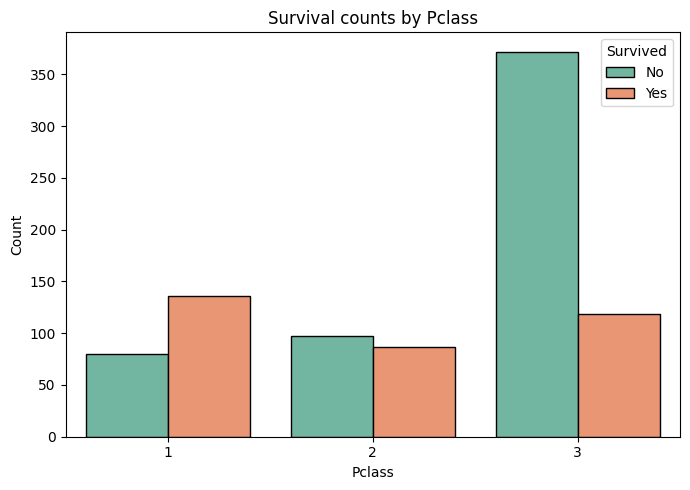

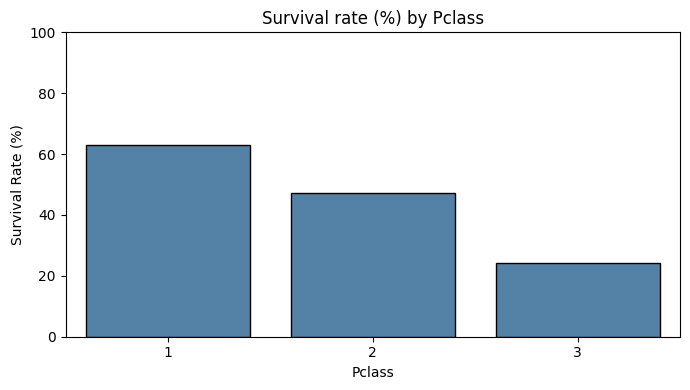

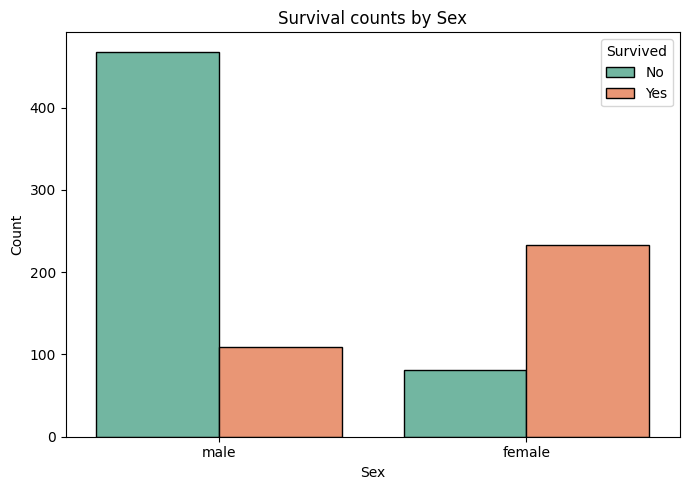

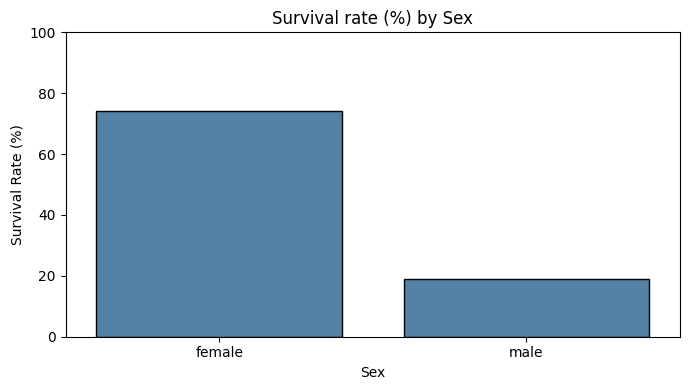

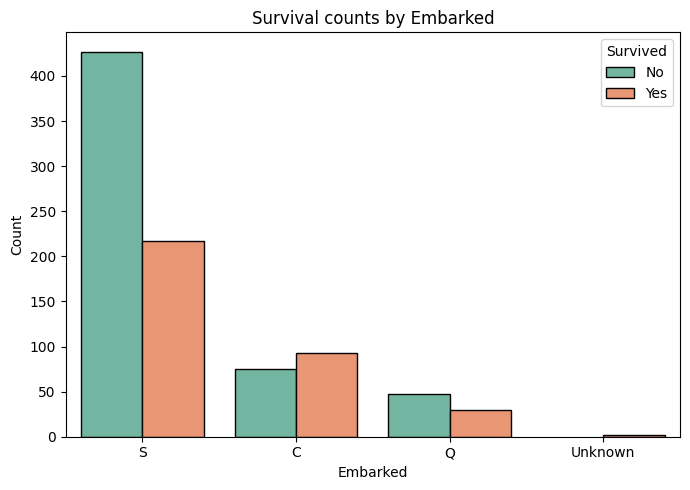

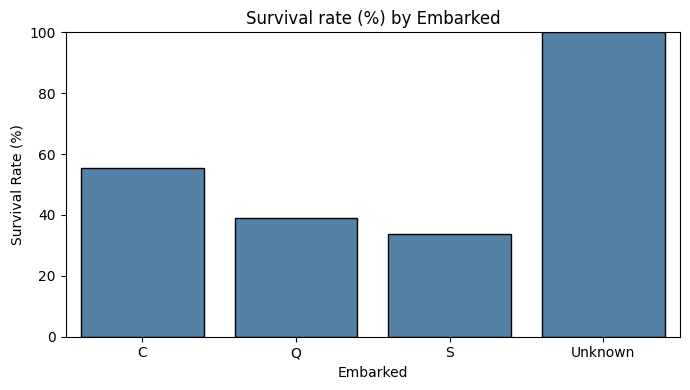

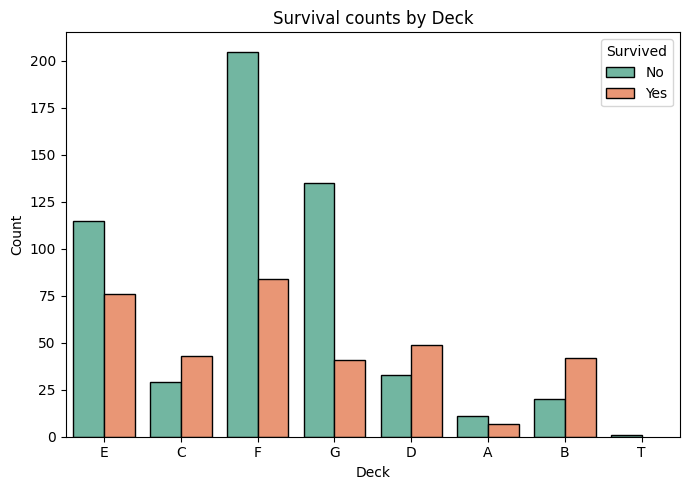

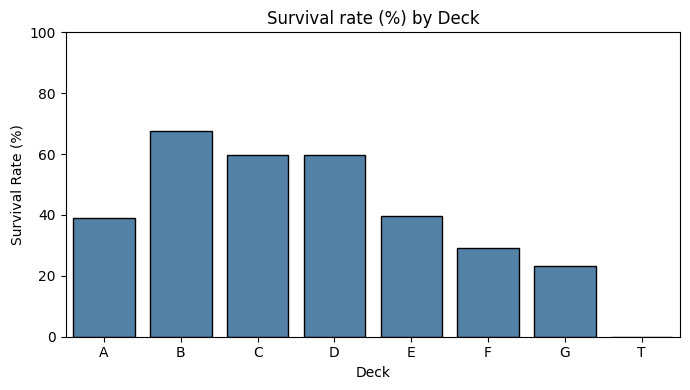

In [431]:
for col in ['Pclass', 'Sex', 'Embarked', 'Deck']:
    plot_survival_by_category(titanic_df, col)

In [432]:
def plot_survival_by_numeric(df, column_name):

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Survived', y=column_name, palette='Set2')
    plt.title(f'{column_name} distribution by Survival')
    plt.xlabel('Survived')
    plt.ylabel(column_name)
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-1970938091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y=column_name, palette='Set2')


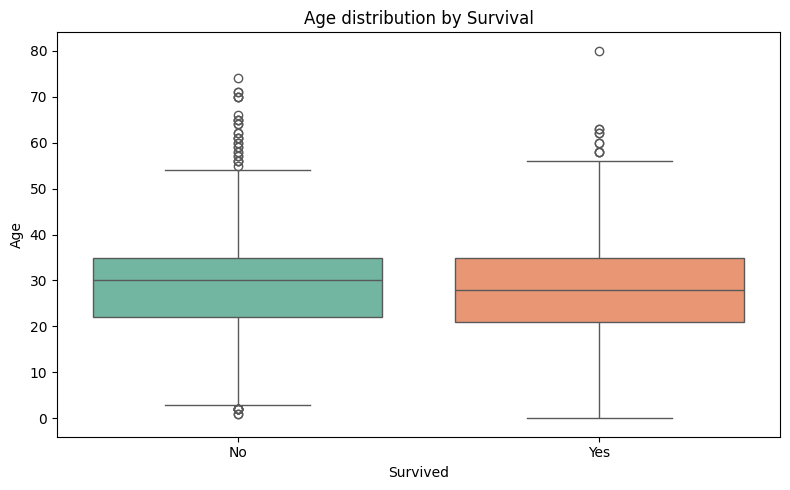

/tmp/ipython-input-1970938091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y=column_name, palette='Set2')


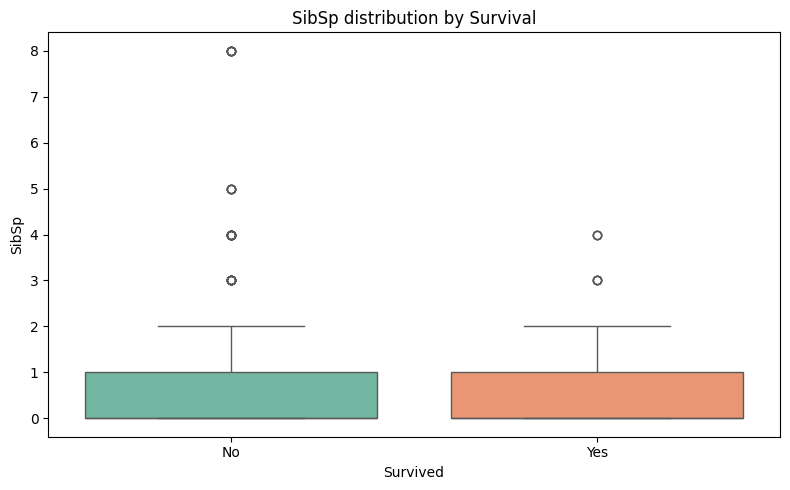

/tmp/ipython-input-1970938091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y=column_name, palette='Set2')


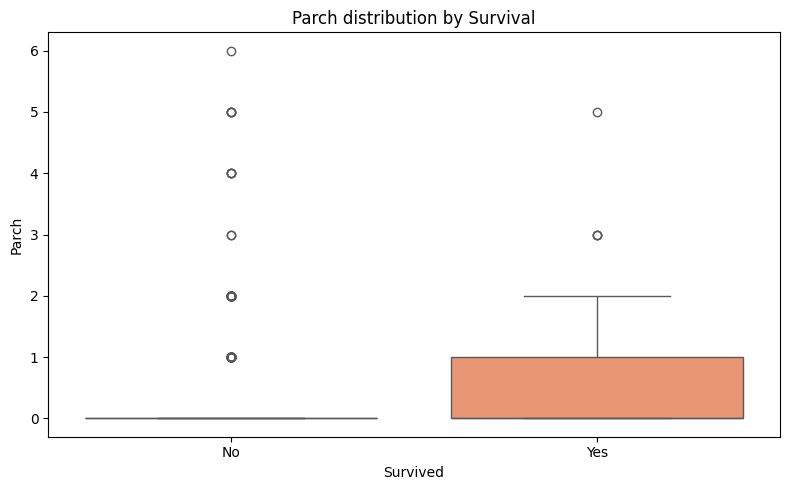

/tmp/ipython-input-1970938091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y=column_name, palette='Set2')


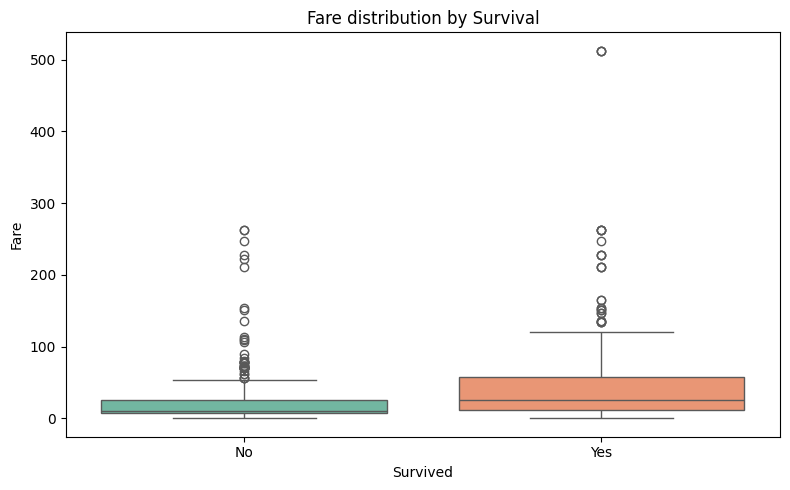

/tmp/ipython-input-1970938091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y=column_name, palette='Set2')


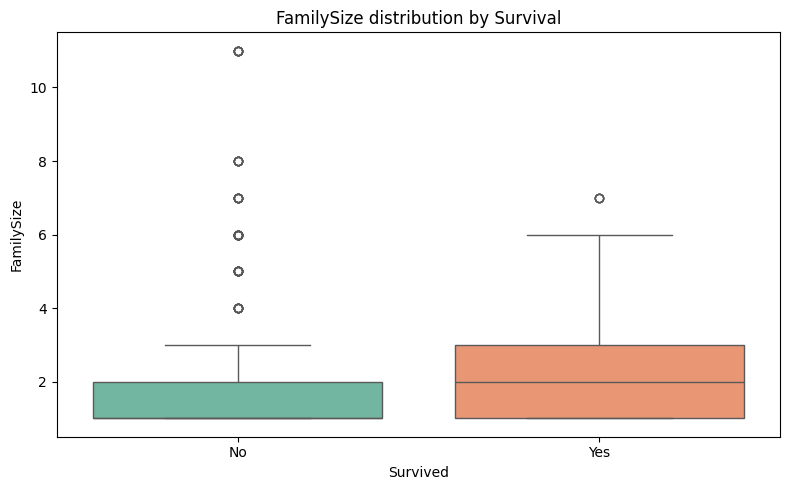

In [433]:
for col in ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']:
    plot_survival_by_numeric(titanic_df, col)

**Stosujemy binary encoding dla kolumny** `Sex` **ze względu na tylko dwie wartości natomiast dla** `Embarked` **stosujemy one-hot encoding ze względu na brak hierachii między portami, dla** `Deck` **stosujemy Ordinal encoding ponieważ pokłady mają hierarchię, tworzymy macierz korelacji**


---




In [434]:
titanic_df['Sex']=titanic_df.Sex.map({"female":1,"male":0})

In [435]:
titanic_df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77
Unknown,2


In [436]:
most_common = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'] = titanic_df['Embarked'].replace('Unknown', most_common)
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=False)

In [438]:
mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'T': 7,
}

titanic_df['Deck'] = titanic_df['Deck'].map(mapping)


In [439]:
def plot_correlation_matrix(df):
  corr = df.corr(numeric_only=True)
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
  plt.title('Correlation Matrix')
  plt.tight_layout()
  plt.show()

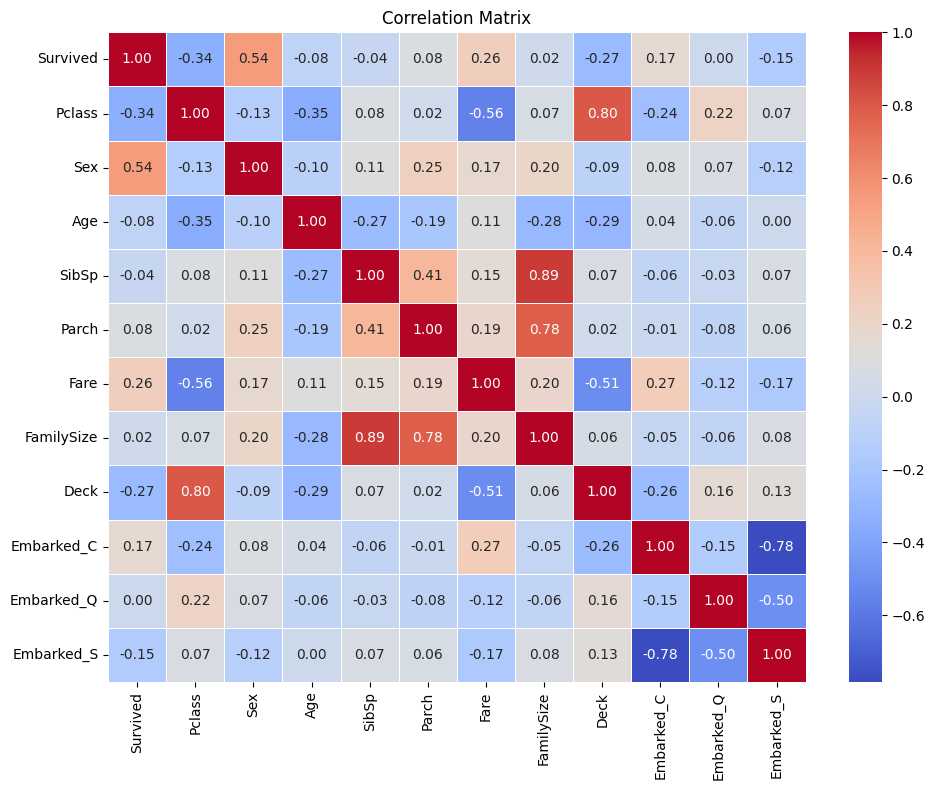

In [440]:
plot_correlation_matrix(titanic_df)